In [1]:
#import librerie necessarie
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
tickers = ["AAPL", "MSFT", "GOOG", "AMZN", "TSLA"]

#scarico i dati da yf, prendendo come periodo 5 anni dal 2020 al 2025 usando come riferiemtno il prezzo di chisura: 

data = yf.download(tickers,start = "2020-01-01",end = "2025-01-01")["Close"]


/tmp/ipykernel_31565/1112835255.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers,start = "2020-01-01",end = "2025-01-01")["Close"]
[*********************100%***********************]  5 of 5 completed


In [ ]:
#ora generiamo  i portafogi 
#devo crearmi la struttura per i portafogli, uso una lista vuota inizialmente 
portafogli = []

## calcolo i rendimenti giornalieri dei singoli titoli  
returns = data.pct_change().dropna() 

#rendimenti annualizzati dei singoli titoli 
mean_returns = returns.mean() * 252

#calcolo matrice covarianza annualizzata
cov_matrix = returns.cov() * 252

#creo un portafoglio equally weighted per il confronto
#eWeight = [0.20,0.20,0.20,0.20,0.20]
#eMUp = np.dot(eWeight,mean_returns)
#eDevp = np.sqrt(eWeight.T @ cov_matrix @ eWeight)
#ePortafoglio = [eMUp,eDevp,eWeight]     

#fisso come risk free un 2% annuo per praticità, 
rf = 0.02

#genero 1000 portafogli
for i in range(1000):

        #genero i pesi casuali per ogni portafoglio 
        weights = np.random.random(len(tickers))  
        #normalizzati   
        weights /= np.sum(weights)  

        #calcolo rendimento atteso portafoglio 
        MUp = np.dot(weights, mean_returns)
        #calcolo deviazione standard portafoglio
        DEVp = np.sqrt(weights.T @ cov_matrix @ weights)


        #calcolo lo sharp ratio 
        sharpe = (MUp - rf)/DEVp

        lista_temp = [MUp,DEVp,sharpe,weights]
        #aggiungo la lista temporanea con i valori appena calcolati del singolo portafoglio alla lista dei portafogli 
        portafogli.append(lista_temp)


##print(portafogli)


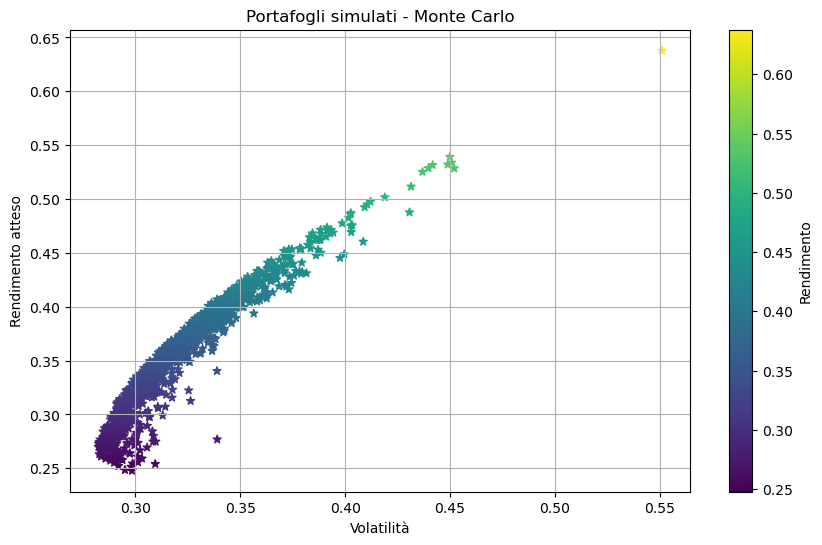

In [ ]:

#estraggo i rendimenti e le volatilità da ogni lista e li raggruppo in liste dove le tipolgie sono separate per porterle plottare
returns = [p[0] for p in portafogli]
volatility = [p[1] for p in portafogli]


plt.figure(figsize=(10,6))
plt.scatter(volatility, returns, c=returns, cmap='viridis', marker='*')
plt.xlabel('Volatilità')
plt.ylabel('Rendimento atteso')
plt.title('Portafogli simulati - Monte Carlo')
plt.colorbar(label='Rendimento')
plt.grid(True)
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

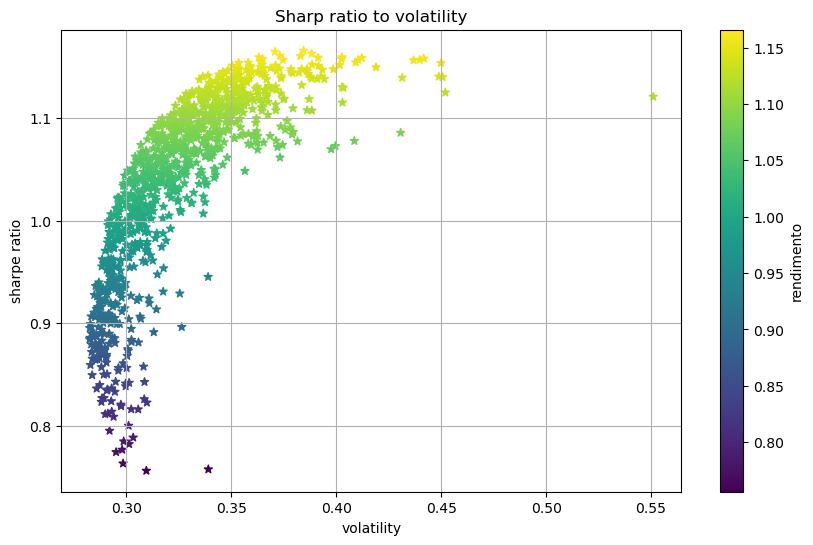

In [ ]:
#Creo un portafoglio equally weighted(20% per ogni titolo) e lo confronto con il migliore generato 
#come identifico il migliore ?



sharps = [p[2] for p in portafogli]
plt.figure(figsize=(10,6))
plt.scatter(volatility,sharps,c=sharps,cmap="viridis",marker="*")
plt.xlabel('volatility')
plt.ylabel('sharpe ratio')
plt.title('Sharp ratio to volatility')
plt.colorbar(label='rendimento')
plt.grid(True)
plt.show



#come rappresento il loro confronto?